# `Project Title:` Customer Churn Prediction
## `Project Methodology:` CRISP ML(Q)
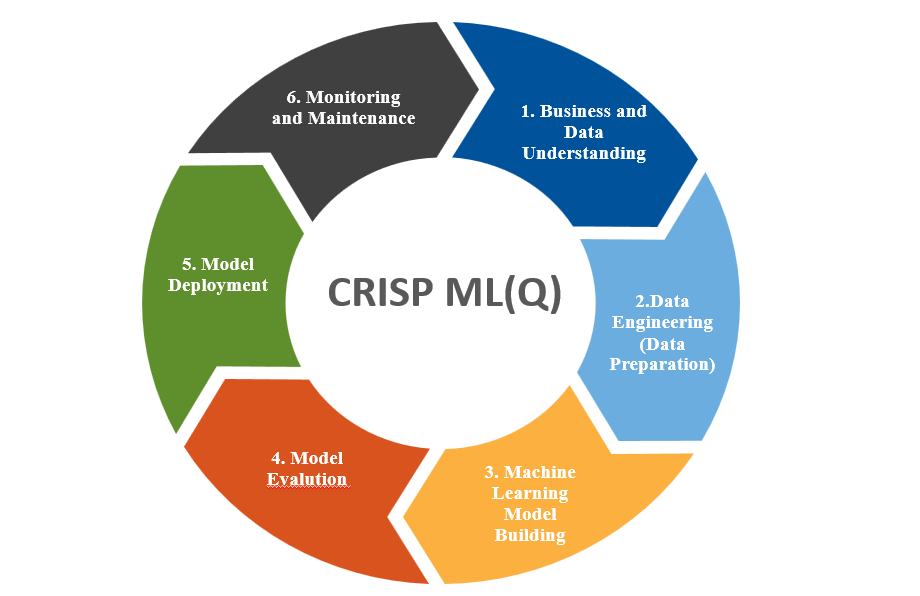


## `Phase 1:`

## `1.1 Business Understanding`

## `Problem Statement:`
    Build a predictive model to estimate the likelihood of customer churn for a telecommunication company. The model should consider factors such as customer demographics, usage patterns, billing history, and customer service interactions.

## `Objective:`
    The primary objective of this project is to develop a predictive model to estimate the likelihood of customer churn for a telecommunications company. By accurately identifying customers who are likely to churn, the company can implement targeted retention strategies to reduce churn rates, increase customer satisfaction, and improve overall profitability.

### `Importing the required libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_selection import RFE
import scipy.stats as stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import joblib
import os
from sklearn import metrics
pd.set_option('display.max_columns',21)

## `1.2 Data Understanding`

#### `Description about the columns`

**customerID:** A unique identifier for each customer.

**gender:** The gender of the customer (Male or Female).

**SeniorCitizen:** Indicates if the customer is a senior citizen (1 for Yes, 0 for No).

**Partner:** Indicates if the customer has a partner (Yes or No).

**Dependents:** Indicates if the customer has dependents (Yes or No).

**tenure:** The number of months the customer has been with the company.

**PhoneService:** Indicates if the customer has phone service (Yes or No).

**MultipleLines:** Indicates if the customer has multiple lines (No, Yes, or No phone service).

**InternetService:** The type of internet service the customer has (DSL, Fiber optic, or No).

**OnlineSecurity:** Indicates if the customer has online security add-on (Yes, No, or No internet service).

**OnlineBackup:** Indicates if the customer has online backup add-on (Yes, No, or No internet service).

**DeviceProtection:** Indicates if the customer has device protection add-on (Yes, No, or No internet service).

**TechSupport:** Indicates if the customer has tech support add-on (Yes, No, or No internet service).

**StreamingTV:** Indicates if the customer has streaming TV service (Yes, No, or No internet service).

**StreamingMovies:** Indicates if the customer has streaming movies service (Yes, No, or No internet service).

**Contract:** The contract term of the customer (Month-to-month, One year, or Two year).

**PaperlessBilling:** Indicates if the customer has paperless billing (Yes or No).

**PaymentMethod:** The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).

**MonthlyCharges:** The amount charged to the customer monthly.

**TotalCharges:** The total amount charged to the customer.

**Churn:** Indicates if the customer has churned (Yes or No).
    
**Customer Demographics:** customerID, gender, SeniorCitizen, Partner, Dependents

**Customer Account Information:** tenure, Contract, PaperlessBilling, PaymentMethod

**Services Subscribed:** PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

**Billing Information:** MonthlyCharges, TotalCharges

**Target Variable:** Churn

In [2]:
df = pd.read_csv(r"C:\Users\sathi\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv") #loading the dataset

In [3]:
df.head(10) #printing the first ten rows

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
6               Yes     Fiber optic             No          Yes   
7  No phone service             DSL            Yes           No   
8               Yes     Fiber optic             No           No   
9                No             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
6               No          No         Yes              No  Month-to-month   
7               No          No          No              No  Month-to-month   
8              Yes         Yes         Yes             Yes  Month-to-month   
9               No          No          No              No        One year   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   
5              Yes           Electronic check           99.65        820.5   
6              Yes    Credit card (automatic)           89.10       1949.4   
7               No               Mailed check           29.75        301.9   
8              Yes           Electronic check          104.80      3046.05   
9               No  Bank transfer (automatic)           56.15      3487.95   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes  
5   Yes  
6    No  
7    No  
8   Yes  
9    No

In [4]:
df.tail() #printing the last five rows

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
7038          Yes               Yes             DSL            Yes   
7039          Yes               Yes     Fiber optic             No   
7040           No  No phone service             DSL            Yes   
7041          Yes               Yes     Fiber optic             No   
7042          Yes                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
7038           No              Yes         Yes         Yes             Yes   
7039          Yes              Yes          No         Yes             Yes   
7040           No               No          No          No              No   
7041           No               No          No          No              No   
7042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
7038        One year              Yes               Mailed check   
7039        One year              Yes    Credit card (automatic)   
7040  Month-to-month              Yes           Electronic check   
7041  Month-to-month              Yes               Mailed check   
7042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
7038           84.80       1990.5    No  
7039          103.20       7362.9    No  
7040           29.60       346.45    No  
7041           74.40        306.6   Yes  
7042          105.65       6844.5    No

In [5]:
df.shape #checking the dataset shape

(7043, 21)

In [6]:
df.isna().sum() # checking for missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**`OBSERVATION:- There are no missing values present in the dataset`**

In [7]:
df.duplicated().sum() #checking for duplicate values

0

**`OBSERVATION:- There are no duplicated records present in the dataset`**

In [8]:
for i in df.columns:
    print(f'unique values of {i}')    #checking the structural errors
    print(df[i].unique())

unique values of customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unique values of gender
['Female' 'Male']
unique values of SeniorCitizen
[0 1]
unique values of Partner
['Yes' 'No']
unique values of Dependents
['No' 'Yes']
unique values of tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unique values of PhoneService
['No' 'Yes']
unique values of MultipleLines
['No phone service' 'No' 'Yes']
unique values of InternetService
['DSL' 'Fiber optic' 'No']
unique values of OnlineSecurity
['No' 'Yes' 'No internet service']
unique values of OnlineBackup
['Yes' 'No' 'No internet service']
unique values of DeviceProtection
['No' 'Yes' 'No internet service']
unique values of TechSupport
['No' 'Yes' 'No internet service']
unique values of StreamingTV
['No' 'Yes' 'No inter

In [9]:
for i in df.columns:
       
    print(f'cardinality of {i} is {df[i].nunique()}') #checking the cardinality of each feature

cardinality of customerID is 7043
cardinality of gender is 2
cardinality of SeniorCitizen is 2
cardinality of Partner is 2
cardinality of Dependents is 2
cardinality of tenure is 73
cardinality of PhoneService is 2
cardinality of MultipleLines is 3
cardinality of InternetService is 3
cardinality of OnlineSecurity is 3
cardinality of OnlineBackup is 3
cardinality of DeviceProtection is 3
cardinality of TechSupport is 3
cardinality of StreamingTV is 3
cardinality of StreamingMovies is 3
cardinality of Contract is 3
cardinality of PaperlessBilling is 2
cardinality of PaymentMethod is 4
cardinality of MonthlyCharges is 1585
cardinality of TotalCharges is 6531
cardinality of Churn is 2


In [10]:
df.dtypes # checking the datatypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
# Total charges features is a numerical but df.dtype is showing object because we have some rows with empty string, i have to flag those values,
totalcharges_empty = df[df['TotalCharges']==' ']

In [12]:
# iam replacing the empty string with null values
df['TotalCharges'] = np.where(df['TotalCharges']==' ',np.nan,df['TotalCharges'])

In [13]:
# changing the datatype from object to float
df['TotalCharges'] = df['TotalCharges'].astype('float')

## **`Phase-2:`** Data Preparation/Data Engineering

### `2.1 Exploratory Data Analysis:`
    EDA mean combination of Statistics and visualization
    Let's dive into to statistical analysis

In [14]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [15]:
df.drop('customerID',axis=1,inplace=True) # here i'm dropping the cusotmerid column beacause it is not useful to our analysis

In [16]:
df[['tenure','TotalCharges','MonthlyCharges']].describe() #statistical analysis

tenure  TotalCharges  MonthlyCharges
count  7043.000000   7032.000000     7043.000000
mean     32.371149   2283.300441       64.761692
std      24.559481   2266.771362       30.090047
min       0.000000     18.800000       18.250000
25%       9.000000    401.450000       35.500000
50%      29.000000   1397.475000       70.350000
75%      55.000000   3794.737500       89.850000
max      72.000000   8684.800000      118.750000

#### `Observations:` 

**`Tenure:`**

    Average: 32.37 months
    Median: 29 months
    Range: 0 to 72 months
    Variability: High (Std Dev: 24.56 months)
    
**`Total Charges:`**

    Average: 2283.30
    Median: 1397.48
    Range: 18.80 to 8684.80
    Variability: Very high (Std Dev: 2266.77)
    Missing Values: 11
    
**`Monthly Charges:`**

    Average: 64.76
    Median: 70.35
    Range: 18.25 to 118.75
    Variability: High (Std Dev: 30.09)

### `Visualization`

In [17]:
# distribution of gender
px.bar(df.gender.value_counts(),color=['blue','red'],title='Distribution of Gender')


#### `Observations:`
    The count of Male is 3555
    The count of Female is 3488

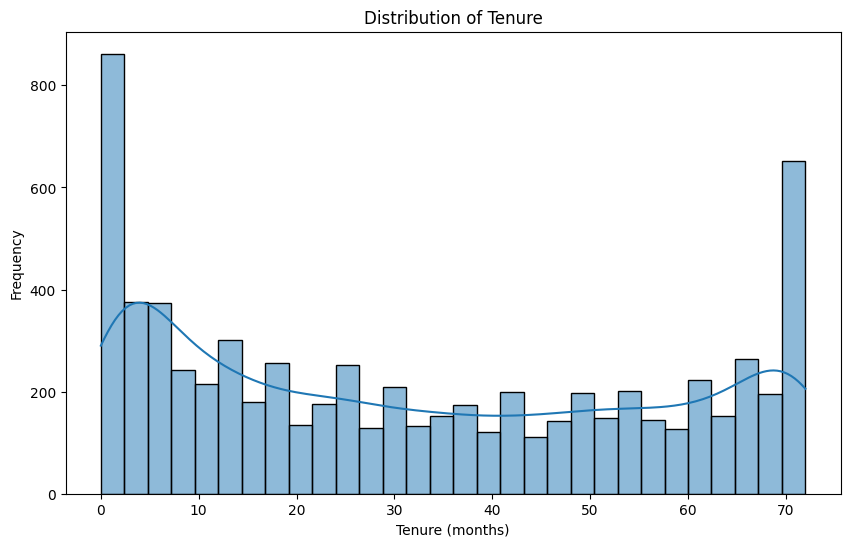

In [18]:
# distribution of Tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

#### `Observations:`
    - The tenure feature ranges from 0-70
    

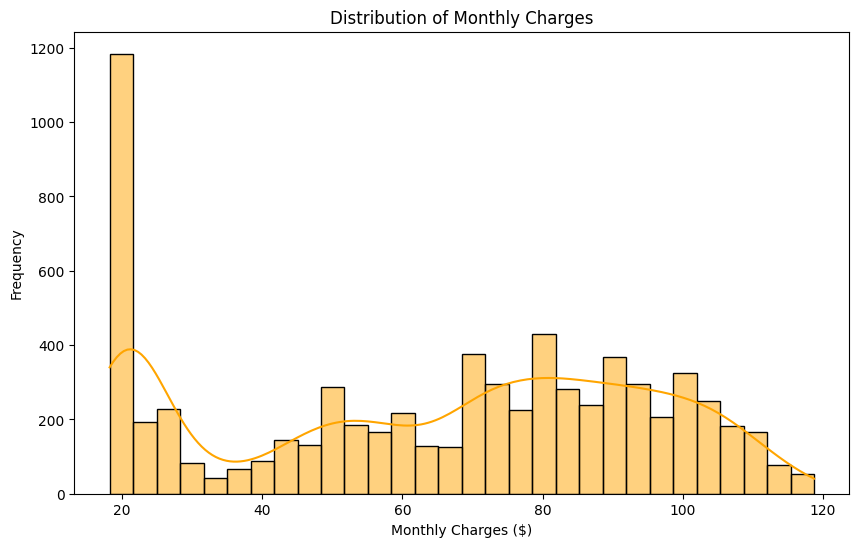

In [19]:
# distribution of Monthly Charges
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='orange')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Frequency')
plt.show()

#### `Observations:`
    - The company might offer different pricing plans at different price points. If the lower-priced plans are more popular
    - As observed Monthly charges 20 has more popularity compare to other charges

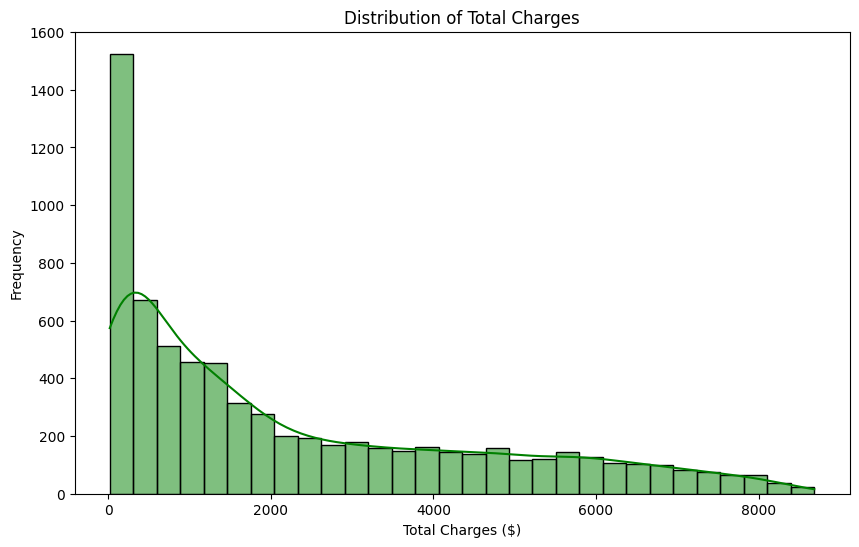

In [20]:
# Distribution of Total Charges
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='green')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges ($)')
plt.ylabel('Frequency')
plt.show()

#### `Observations:`
    - The data is following right skewed distribution

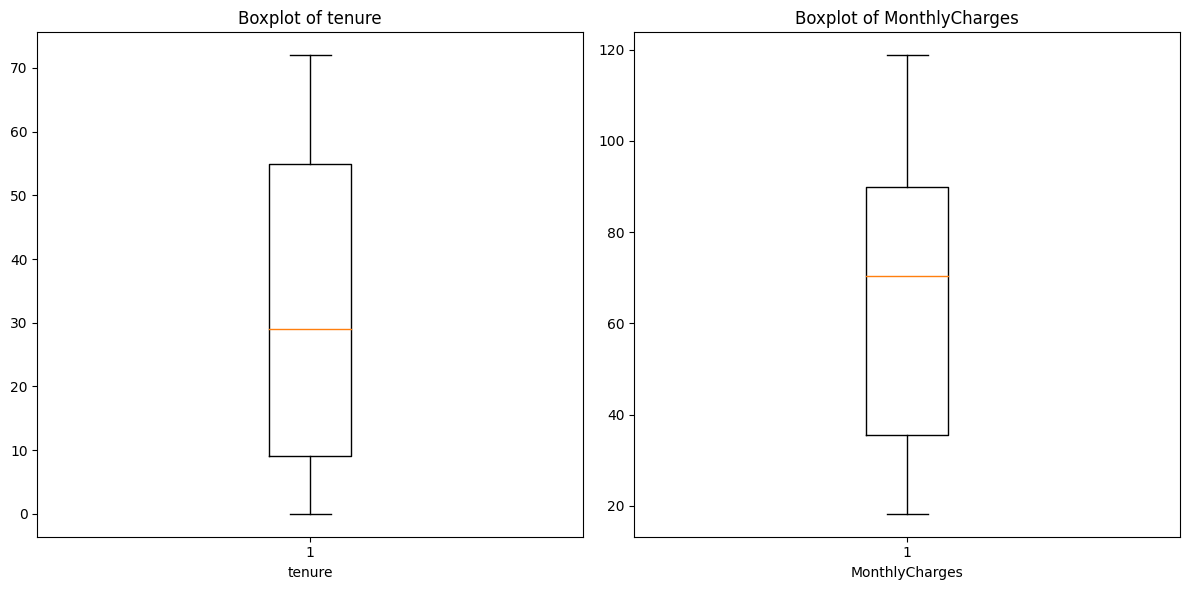

In [21]:
columns = ['tenure','MonthlyCharges']
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns, start=1):
    plt.subplot(1, len(columns), i)
    plt.boxplot(df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Box plot of Total Charges')

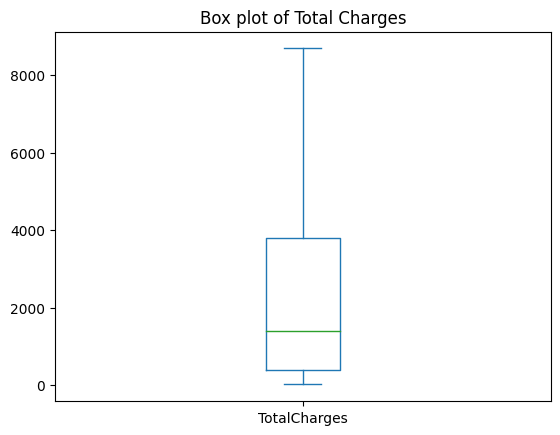

In [22]:
df['TotalCharges'].plot.box()
plt.title('Box plot of Total Charges')

#### `Observations:`
    - The above three plot represents there is no outlier in the data

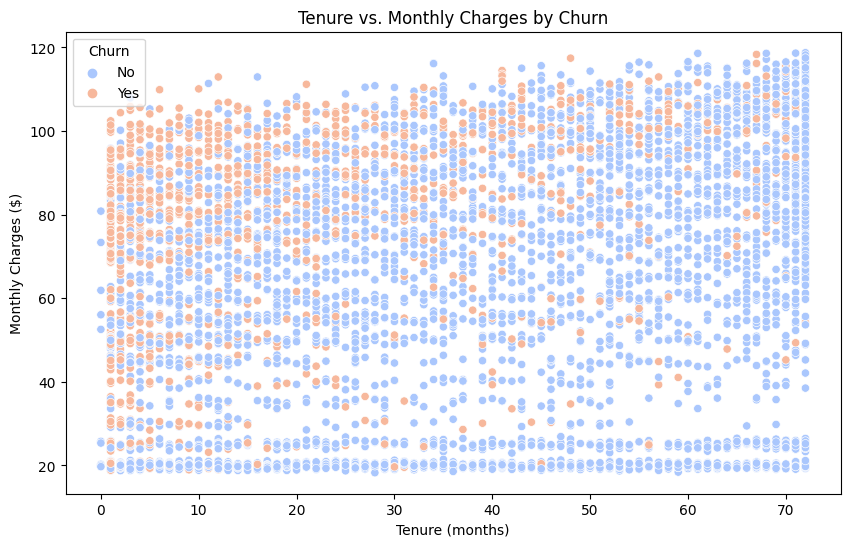

In [23]:
# relationship between Tenure and Monthly Charges with Churn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='coolwarm')
plt.title('Tenure vs. Monthly Charges by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Churn')
plt.show()

In [24]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

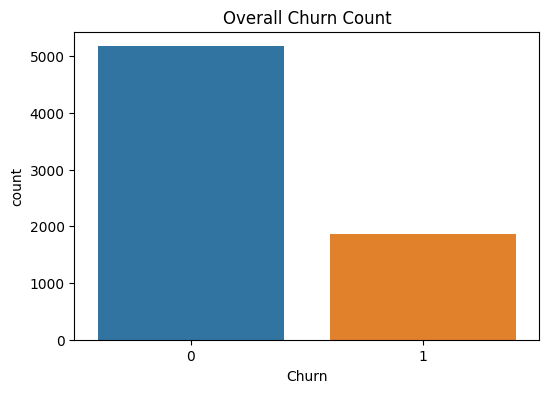

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Overall Churn Count')
plt.xlabel('Churn')
plt.show()

#### `Observations:`
    - There are more non-churned customers compared to churned ones.

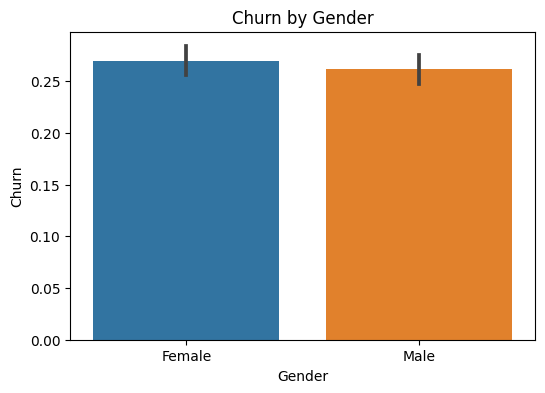

In [26]:
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='Churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.show()

#### `Observations:`
    - The churn rate appears to be similar between male and female customers.

In [27]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x : 'Yes' if x == 1 else 'No')

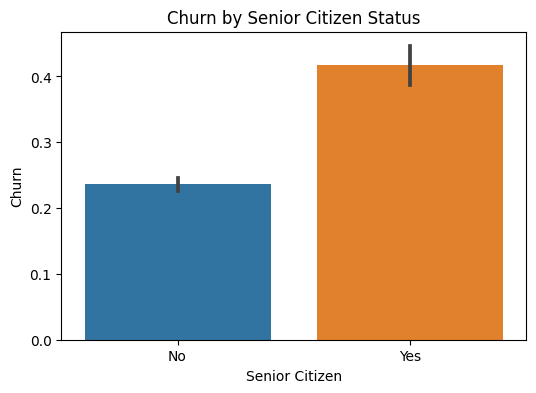

In [28]:
# Churn Rate by Senior Citizen
plt.figure(figsize=(6, 4))
sns.barplot(x='SeniorCitizen', y='Churn', data=df)
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Senior Citizen')
plt.show()

#### `Observations:`
    - Senior citizens have a higher churn rate compared to non-senior citizens.

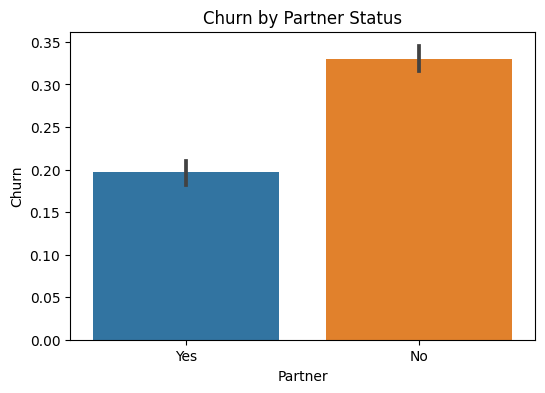

In [29]:
# Churn by Partner
plt.figure(figsize=(6, 4))
sns.barplot(x='Partner', y='Churn', data=df)
plt.title('Churn by Partner Status')
plt.xlabel('Partner')
plt.show()

#### `Observations:`
    - Customers without partners have a higher churn rate compared to those with partners.

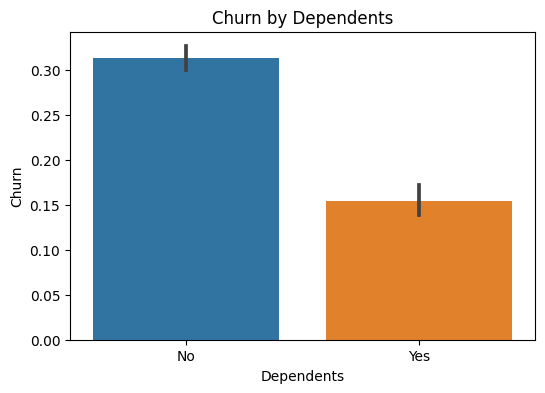

In [30]:
# Churn by Dependents
plt.figure(figsize=(6, 4))
sns.barplot(x='Dependents', y='Churn', data=df)
plt.title('Churn by Dependents')
plt.xlabel('Dependents')
plt.show()

#### `Observations:`
    - Customers without dependents have a higher churn rate compared to those with dependents.

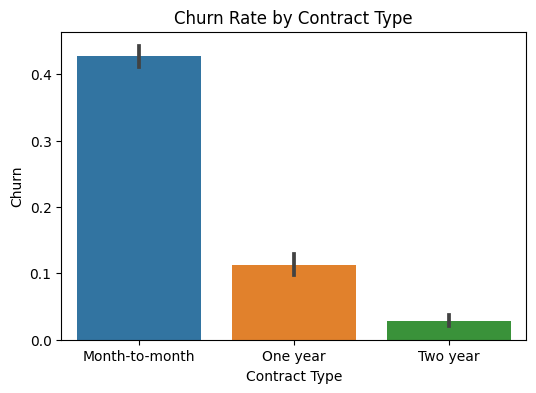

In [31]:
# Churn by Contract Type
plt.figure(figsize=(6, 4))
sns.barplot(x='Contract', y='Churn', data=df)
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.show()

#### `Observations:`
        - Month-to-month contract customers have a much higher churn rate compared to those with one-year or two-year contracts.

#### `Conclusion`
Senior Citizens and customers without partners are more likely to churn.

In [32]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

#### Hypothesis Testing
    Gender and Churn
    Null Hypothesis (H0): Gender is not associated with churn.
    Alternative Hypothesis (H1): Gender is associated with churn.

In [33]:
contingency_table = pd.crosstab(df['gender'], df['Churn'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test:")
print(f"Chi2: {chi2}")
print(f"P-value: {p}")

Chi-Square Test:
Chi2: 0.4840828822091383
P-value: 0.48657873605618596


#### `Observations:`
    - The p-value is Less than 0.05, we conclude that gender is significantly associated with churn.

### `2.1 Data Cleaning`

In [34]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [35]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True) #filling with median 

In [36]:
df['MultipleLines'] = df['MultipleLines'].apply(lambda x : 'Yes' if x == 'Yes' else 'No')

In [37]:
col = []
for i in df.columns:
    if ('No' and 'Yes' and 'No internet service') in df[i].unique() :
        
        col.append(i)

In [38]:
df['InternetService'] = df['InternetService'].apply(lambda x : 'No' if x == 'No' else 'Yes')

In [39]:
for i in col:
    df[i] = df[i].apply(lambda x : 'No' if x == 'No' else 'Yes')

### Binnig/grouping/Discretization
'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies'
 i grouped this columns into one column

In [40]:
df['TotalOnlineServices'] = df[col].replace({'Yes': 1, 'No': 0}).sum(axis=1) #

In [41]:
df.drop(col,axis=1,inplace=True)

### `DATA PREPROCESSING AND MODEL BUILDING USING MACHINE LEARNING PIPELINES`

In [42]:
X = df.drop('Churn',axis=1) #selecting the input features
y = df['Churn'] #selecting the target variable
X_train ,X_test, y_train ,y_test = train_test_split(X,y,test_size=0.25 , random_state=42) #splitting the data into training and testing

In [43]:
num_col = []
for i in X.select_dtypes(exclude='object'): #selecting the numerical features
    if X[i].nunique()>7:
        num_col.append(i)


In [44]:
one_hot_col = []
ordinal_col = []

for i in X.select_dtypes(include='object'): #selecting the categorical features
    #print(X[i].unique())
    if X[i].nunique()>2:
        ordinal_col.append(i)
    else:
        one_hot_col.append(i)

In [45]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')
ordinal_transformer = OrdinalEncoder()


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat_onehot', categorical_transformer, one_hot_col),
        ('cat_ordinal', ordinal_transformer, ordinal_col)
    ]
)

In [46]:
pipelines = {
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=LogisticRegression())),
        ('classifier', LogisticRegression())
    ]),
    'sgd_classification': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=SGDClassifier())),
        ('classifier', SGDClassifier())
    ]),
    'decision_tree_classification': Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', RFE(estimator=DecisionTreeClassifier())),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest_classification': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ])
}

# Define hyperparameters for each model, including number of features for RFE
param_grid = {
    'logistic_regression': {
        'feature_selection__n_features_to_select': [i for i in range(5,10,1)],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    'sgd_classification': {
        'feature_selection__n_features_to_select': [i for i in range(5,10,1)],
        'classifier__alpha': [0.0001, 0.001, 0.01, 0.1, 1]
    },
    'decision_tree_classification': {
        'feature_selection__n_features_to_select': [5, 10, 15],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50]
    },
    'random_forest_classification': {
        'classifier__n_estimators': [50, 100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50]
    }
}

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning for each model
best_models = {}

for name, pipeline in pipelines.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print()



Tuning hyperparameters for logistic_regression...
Best parameters: {'classifier__C': 10, 'feature_selection__n_features_to_select': 9}

Tuning hyperparameters for sgd_classification...
Best parameters: {'classifier__alpha': 0.01, 'feature_selection__n_features_to_select': 9}

Tuning hyperparameters for decision_tree_classification...
Best parameters: {'classifier__max_depth': 10, 'feature_selection__n_features_to_select': 5}

Tuning hyperparameters for random_forest_classification...
Best parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}



In [47]:
import os
for name, model in best_models.items():
    print("_"*30)
    print("*"*10, name, "*"*10)
    joblib.dump(model, f'{name}.pkl')
    model = joblib.load(f'{name}.pkl')
    
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score", metrics.accuracy_score(y_test, y_test_pred))
    
    print("Model Size:", os.path.getsize(f'{name}.pkl'), "Bytes")

______________________________
********** logistic_regression **********
CPU times: total: 31.2 ms
Wall time: 31.6 ms
Accuracy Score 0.808374733853797
Model Size: 8414 Bytes
______________________________
********** sgd_classification **********
CPU times: total: 0 ns
Wall time: 24.1 ms
Accuracy Score 0.8090844570617459
Model Size: 8900 Bytes
______________________________
********** decision_tree_classification **********
CPU times: total: 15.6 ms
Wall time: 23.9 ms
Accuracy Score 0.7551454932576295
Model Size: 257608 Bytes
______________________________
********** random_forest_classification **********
CPU times: total: 31.2 ms
Wall time: 50 ms
Accuracy Score 0.8048261178140526
Model Size: 2956415 Bytes


### `MACHINE LEARNING MODEL EVALUATION`


In [48]:
print("ML MODEL EVALUATION")
for name, model in best_models.items():
    print("_"*50)
    print("*"*15, name, "*"*15)
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score:- ", metrics.accuracy_score(y_test, y_test_pred))
    print("F-1 Score:- ",metrics.f1_score(y_test, y_test_pred,average= 'weighted'))
    print("Recall Score:- ",metrics.recall_score(y_test, y_test_pred,average= 'weighted'))

ML MODEL EVALUATION
__________________________________________________
*************** logistic_regression ***************
CPU times: total: 0 ns
Wall time: 33.5 ms
Accuracy Score:-  0.808374733853797
F-1 Score:-  0.8024736477668891
Recall Score:-  0.808374733853797
__________________________________________________
*************** sgd_classification ***************
CPU times: total: 15.6 ms
Wall time: 38.1 ms
Accuracy Score:-  0.8090844570617459
F-1 Score:-  0.8010485747784964
Recall Score:-  0.8090844570617459
__________________________________________________
*************** decision_tree_classification ***************
CPU times: total: 0 ns
Wall time: 31.3 ms
Accuracy Score:-  0.7551454932576295
F-1 Score:-  0.7419952385799933
Recall Score:-  0.7551454932576295
__________________________________________________
*************** random_forest_classification ***************
CPU times: total: 15.6 ms
Wall time: 66.4 ms
Accuracy Score:-  0.8048261178140526
F-1 Score:-  0.796610996520767

In [49]:
model = joblib.load('logistic_regression.pkl')

In [50]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)